### **1. Imports**

In [2]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
sns.set_style('darkgrid')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)


print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

TF version: 2.12.0
Hub version: 0.12.0
GPU is available


### **2. TL model**

In [3]:
MODULE_HANDLE= tf.keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

module_selection = ("ResNet50v2", 224)
handle_base, pixels = module_selection
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}".format("ResNet50v2", IMAGE_SIZE))

BATCH_SIZE = 128

102869336/102869336 [==============================] - 1s 0us/step
Using ResNet50v2 with input size (224, 224)


### **3. Data preparation v2**

In [20]:
'''#Specifying the path of the inputs
train_data_path = '/kaggle/input/dataset/train'
test_data_path = '/kaggle/input/dataset/test'
valid_data_path = '/kaggle/input/dataset/val''''

In [21]:
'''#Printing the labels of the data
labels = os.listdir(valid_data_path)
print(labels)'''

['OSCC', 'Normal']


In [22]:
'''#Creating a directory to store all the data (train, test, val) together
data_path = '/kaggle/working/data'

if not os.path.exists(data_path):
    os.mkdir(data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")'''

Folder already exist


In [23]:
'''#Creating two subdirectories to store Normal data and OSCC data respectively
normal_data_path = '/kaggle/working/data/Normal'
oscc_data_path = '/kaggle/working/data/OSCC'

if not os.path.exists(normal_data_path):
    os.mkdir(normal_data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")
    
if not os.path.exists(oscc_data_path):
    os.mkdir(oscc_data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")'''

Folder already exist
Folder already exist


In [24]:
'''#Function to copy data from input directory to the newly created directories
def copy_data(d_path, saved_path):
    for i in labels:
        images = os.listdir(d_path + '/' + i)
        for j in images:
            path = d_path +'/' + i
            img = cv2.imread(path + '/' + j)
            s_path = saved_path + '/' + i + '/' + j
            cv2.imwrite(s_path, img)'''

In [25]:
'''#Moving the data and calculating the size of the total dataset available
def calc_dataset_size():
    norm_path = len(os.listdir(data_path + '/' + labels[0]))
    oscc_path = len(os.listdir(data_path + '/' + labels[1]))
    return norm_path + oscc_path

copy_data(train_data_path, data_path)
dataset_size= calc_dataset_size()
print("Dataset size after moving training data: ", dataset_size)

copy_data(test_data_path, data_path)
dataset_size= calc_dataset_size()
print("Dataset size after moving testing data: ", dataset_size)

copy_data(valid_data_path, data_path)
dataset_size= calc_dataset_size()
print("Dataset size after moving validation data: ", dataset_size)'''

Dataset size after moving training data:  4946
Dataset size after moving testing data:  5072
Dataset size after moving validation data:  5192


In [26]:
'''#Creating a DataFrame which has 2 columns; path_of_image_file and its label
def main(train_data_path):    
    for dirs in [train_data_path]:

        filepaths = []
        labels = []
        classes_list = sorted(os.listdir(dirs))

        filepaths,labels = get_fileList(classes_list, dirs, filepaths, labels)
        
        train_df = obtain_train_df(filepaths, labels)
        
            
    return train_df



def get_fileList(classes_list, dirs, filepaths, labels):    
    for s_class in classes_list:
        
        label = s_class
        classpath = os.path.join(dirs, s_class)
        flist = sorted(os.listdir(classpath))
        
        store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)
        
    return filepaths, labels


def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):
    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label)



def obtain_train_df(filepaths, labels):
    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df'''

In [36]:
#df = main(data_path)
#df.head()

,image_path,label
0,/kaggle/working/data/Normal/Normal_100x_1.jpg,Normal
1,/kaggle/working/data/Normal/Normal_100x_10.jpg,Normal
2,/kaggle/working/data/Normal/Normal_100x_11.jpg,Normal
3,/kaggle/working/data/Normal/Normal_100x_12.jpg,Normal
4,/kaggle/working/data/Normal/Normal_100x_13.jpg,Normal


In [34]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5192 entries, 0 to 5191
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5192 non-null   object
 1   label       5192 non-null   object
dtypes: object(2)
memory usage: 81.2+ KB


In [38]:
#df.describe()

,image_path,label
count,5192,5192
unique,5192,2
top,/kaggle/working/data/Normal/Normal_100x_1.jpg,OSCC
freq,1,2698


In [42]:
'''print("Number of null values:")
print(df.isnull().sum())
print("Number of unique values:")
print(df.nunique())'''

Number of null values:
image_path    0
label         0
dtype: int64
Number of unique values:
image_path    5192
label            2
dtype: int64


In [2]:
print("Following is old code")

Following is old code


### **3. Data Preparation v1**

In [15]:
datagen_kwargs = dict(rescale=1./255)
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.1,
   **datagen_kwargs)


valid_generator = valid_datagen.flow_from_directory(
    '/kaggle/input/dataset/val',
    shuffle = False,
    **dataflow_kwargs
)

do_data_augmentation = True
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2, validation_split=0.1,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen


train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dataset/train', shuffle=True, **dataflow_kwargs)

Found 120 images belonging to 2 classes.
Found 4946 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'Normal': 0, 'OSCC': 1}

In [17]:
do_fine_tuning = True

### **4. Model Specification**

In [18]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=do_fine_tuning),
    tf.keras.layers.BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    tf.keras.layers.Dense(256, kernel_regularizer= tf.keras.regularizers.l2(l= 0.016), activity_regularizer= tf.keras.regularizers.l1(0.006),
                bias_regularizer= tf.keras.regularizers.l1(0.006), activation= 'relu'),
    tf.keras.layers.Dropout(rate=0.4, seed= 42),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                         activation= 'softmax')
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with <keras.engine.functional.Functional object at 0x7d34646e1900>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              25613800  
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               256256    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 25,874,570
Trainable par

In [19]:
model.compile(
  optimizer="adam",
  loss= 'categorical_crossentropy',
  metrics=['accuracy'])

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0, verbose=0, mode='min', baseline= None)
plateau= tf.keras.callbacks.ReduceLROnPlateau(monitor= 'val_loss', factor= 0.2, patience= 4, verbose= 0, mode= 'min')

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size

### **5. Training the model**

In [21]:
hist = model.fit(
    train_generator,
    epochs=100,
    verbose= 1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, plateau],
    shuffle= False
).history

Epoch 1/100
38/38 [==============================] - 298s 6s/step - loss: 3.6486 - accuracy: 0.7389 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - 147s 4s/step - loss: 0.7365 - accuracy: 0.8575 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - 149s 4s/step - loss: 0.4024 - accuracy: 0.8748 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - 149s 4s/step - loss: 0.3568 - accuracy: 0.8847 - lr: 0.0010
Epoch 5/100
38/38 [==============================] - 148s 4s/step - loss: 0.3081 - accuracy: 0.8947 - lr: 0.0010
Epoch 6/100
38/38 [==============================] - 147s 4s/step - loss: 0.3023 - accuracy: 0.8978 - lr: 0.0010
Epoch 7/100
38/38 [==============================] - 148s 4s/step - loss: 0.2703 - accuracy: 0.9176 - lr: 0.0010
Epoch 8/100
38/38 [==============================] - 148s 4s/step - loss: 0.2502 - accuracy: 0.9223 - lr: 0.0010
Epoch 9/100
38/38 [==============================] - 148s 4s/step - loss: 0.2314 - accuracy: 0.9

### **6. Testing the model**

In [22]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
   **datagen_kwargs)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dataset/test',
    shuffle = False,
    **dataflow_kwargs
)

preds = model.evaluate(test_generator)
preds = (model.predict(test_generator) > 0.5).astype("int32")

Found 126 images belonging to 2 classes.
1/1 [==============================] - 9s 9s/step


### **7. Plotting accuracy and loss graph, confusion matrix, ROC curve**

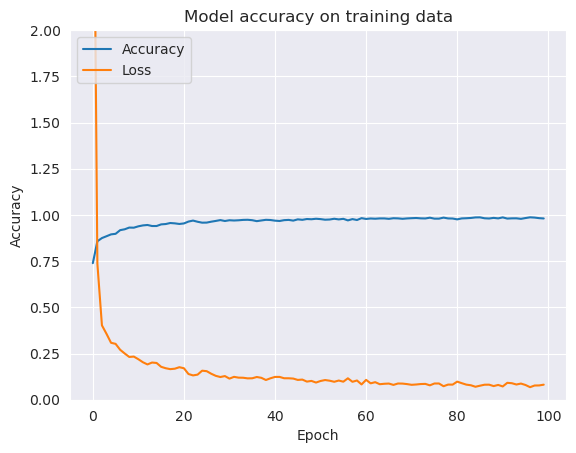

In [24]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(hist['accuracy'])
plt.plot(hist['loss'])
plt.title('Model accuracy on training data')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 2])
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

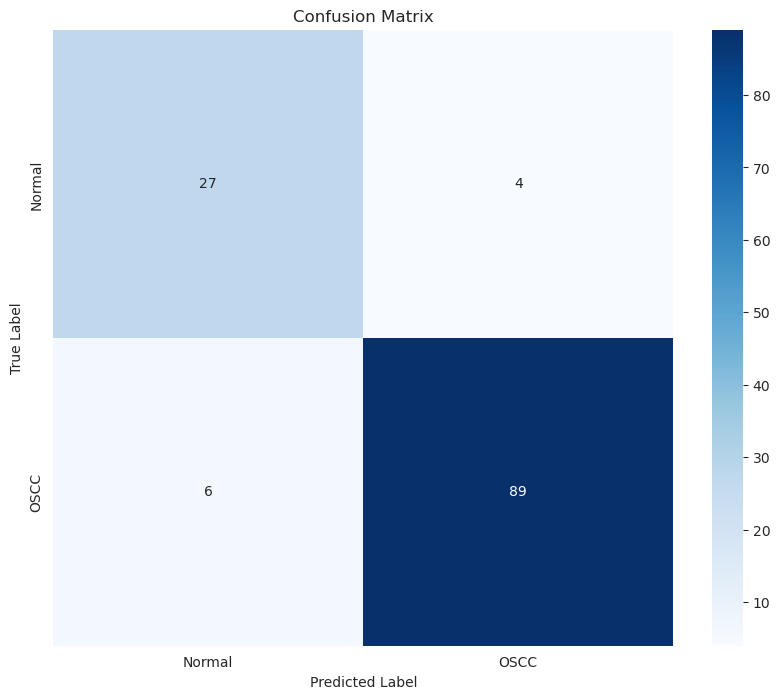

              precision    recall  f1-score   support

      Normal       0.82      0.87      0.84        31
        OSCC       0.96      0.94      0.95        95

    accuracy                           0.92       126
   macro avg       0.89      0.90      0.90       126
weighted avg       0.92      0.92      0.92       126



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true_labels = test_generator.classes
y_pred_labels = np.argmax(preds, axis=1)

class_names = list(test_generator.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))


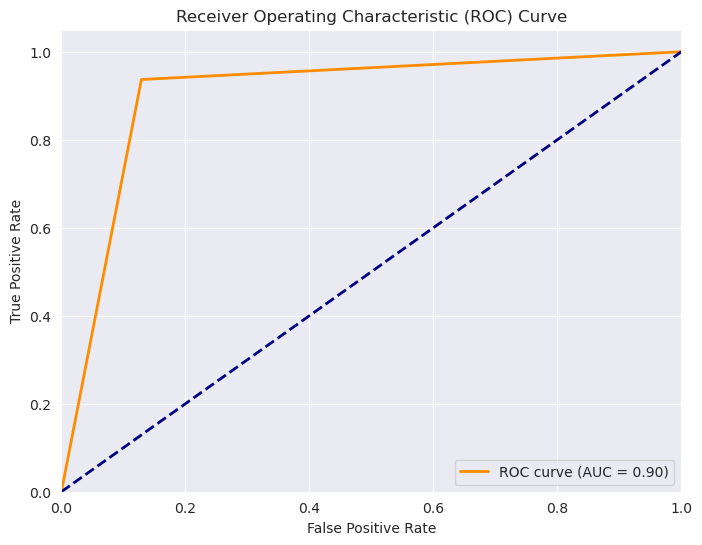

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your true labels in 'y_true' and predicted probabilities in 'y_pred_probs'

# Define a function to calculate the ROC curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_true_labels, y_pred_labels)

# Plot the ROC curve
plot_roc_curve(fpr, tpr)


### **8. Saving the model**

In [54]:
# serialize model to JSON
# serialize weights to HDF5
model.save_weights("ResNet50v2.h5")

#latest version on Kaggle is version 3